In [2]:
#录入数据
x_train=[[6],[8],[10],[14],[18]]
y_train=[[7],[9],[13],[17.5],[18]]
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

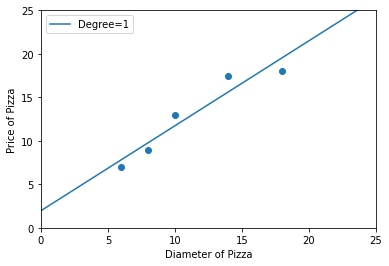

R-squared值： 0.9100015964240102


In [4]:
#使用线性回归模型预测
import numpy as np
xx=np.linspace(0,26,100)
xx=xx.reshape(xx.shape[0],1)
yy=regressor.predict(xx)

#作图
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)

plt1,=plt.plot(xx,yy,label="Degree=1")

plt.axis([0,25,0,25])
plt.xlabel('Diameter of Pizza')
plt.ylabel('Price of Pizza')
plt.legend(handles=[plt1])
plt.show()

#输出R-squared值
print('R-squared值：',regressor.score(x_train,y_train))

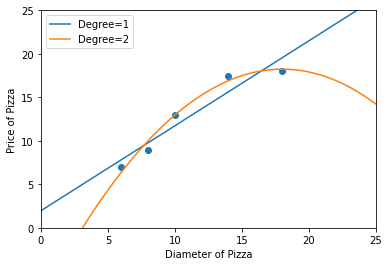

R-squared值： 0.9816421639597427


In [6]:
#2次多项式进行拟合
from sklearn.preprocessing import PolynomialFeatures
poly2=PolynomialFeatures(degree=2)
#标准化
x_train_poly2=poly2.fit_transform(x_train)

regressor_poly2=LinearRegression()
regressor_poly2.fit(x_train_poly2,y_train)
xx_poly2=poly2.transform(xx)

#预测
yy_poly2=regressor_poly2.predict(xx_poly2)

#作图
plt.scatter(x_train,y_train)

plt1,=plt.plot(xx,yy,label="Degree=1")
plt2,=plt.plot(xx,yy_poly2,label="Degree=2")

plt.axis([0,25,0,25])
plt.xlabel('Diameter of Pizza')
plt.ylabel('Price of Pizza')
plt.legend(handles=[plt1,plt2])
plt.show()

#输出R-squared值
print('R-squared值：',regressor_poly2.score(x_train_poly2,y_train))

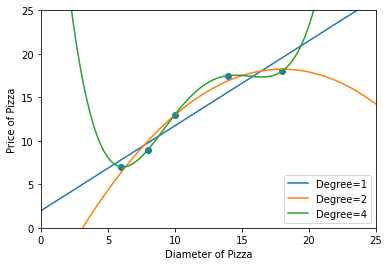

R-squared值： 1.0


In [7]:
#4次多项式进行拟合
from sklearn.preprocessing import PolynomialFeatures
poly4=PolynomialFeatures(degree=4)
#标准化
x_train_poly4=poly4.fit_transform(x_train)

regressor_poly4=LinearRegression()
regressor_poly4.fit(x_train_poly4,y_train)
xx_poly4=poly4.transform(xx)

#预测
yy_poly4=regressor_poly4.predict(xx_poly4)

#作图
plt.scatter(x_train,y_train)

plt1,=plt.plot(xx,yy,label="Degree=1")
plt2,=plt.plot(xx,yy_poly2,label="Degree=2")
plt4,=plt.plot(xx,yy_poly4,label="Degree=4")

plt.axis([0,25,0,25])
plt.xlabel('Diameter of Pizza')
plt.ylabel('Price of Pizza')
plt.legend(handles=[plt1,plt2,plt4])
plt.show()

#输出R-squared值
print('R-squared值：',regressor_poly4.score(x_train_poly4,y_train))

In [12]:
#准备测试数据
x_test=[[6],[8],[11],[16]]
y_test=[[8],[12],[15],[18]]

#线性打分
regressor.score(x_test,y_test)


0.809726797707665

In [13]:
#2次多项式
x_test_poly2=poly2.transform(x_test)
regressor_poly2.score(x_test_poly2,y_test)

0.8675443656345073

In [14]:
#4次多项式
x_test_poly4=poly4.transform(x_test)
regressor_poly4.score(x_test_poly4,y_test)

0.8095880795766807

In [15]:
#Lasso模型 L1范式
from sklearn.linear_model import Lasso
lasso_poly4=Lasso()
lasso_poly4.fit(x_train_poly4,y_train)
print(lasso_poly4.score(x_test_poly4,y_test))

0.8388926873604382


E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7226030013118618, tolerance: 0.009720000000000001
  model = cd_fast.enet_coordinate_descent(


In [16]:
#输出参数表
print(lasso_poly4.coef_)

[ 0.00000000e+00  0.00000000e+00  1.17900534e-01  5.42646770e-05
 -2.23027128e-04]


In [19]:
regressor_poly4.score(x_test_poly4,y_test)


0.8095880795766807

In [20]:
print(regressor_poly4.coef_)

[[ 0.00000000e+00 -2.51739583e+01  3.68906250e+00 -2.12760417e-01
   4.29687500e-03]]


In [21]:
#看参数差异
print(np.sum(regressor_poly4.coef_**2))

647.3826457369564


In [22]:
#Ridge模型 L2范式
from sklearn.linear_model import Ridge
ridge_poly4=Ridge()
ridge_poly4.fit(x_train_poly4,y_train)
print(ridge_poly4.score(x_test_poly4,y_test))

0.8374201759366577


In [23]:
#输出参数表
print(ridge_poly4.coef_)

[[ 0.         -0.00492536  0.12439632 -0.00046471 -0.00021205]]


In [24]:
#看参数差异
print(np.sum(ridge_poly4.coef_**2))

0.015498965203571016
